In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the CIFAR-100 Dataset

In [3]:
from tensorflow.keras.datasets import cifar100

In [4]:
# Load the CIFAR-100 dataset

(train_image, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 3s 0us/step


In [5]:
# Confirm that reloading the dataset does not require a download

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

#### Examine the Dataset

In [6]:
# Examine the shape of the data.
print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


[41]


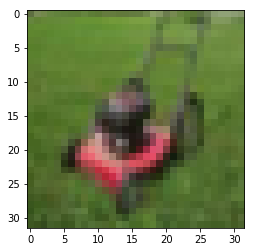

In [7]:
# Examine one of the images and its corresponding label

plt.imshow(train_images[500])
print(train_labels[500])

In [8]:
# Load the list of labels from a JSON file

import json

with open('data/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [9]:
# Print a few of the labels

cifar100_fine_labels[0:10]

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle']

In [10]:
# Print the corresponding label for the example above

cifar100_fine_labels[41]

'lawn_mower'

#### Load the data using different label modes

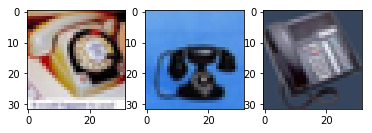

In [11]:
# Display a few examples from category 87 (index 86) and the list of labels

examples = train_images[(train_labels.T == 86)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [12]:
# Reload the data using the 'coarse' label mode

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='coarse') #superclasses of the cifar100 dataset

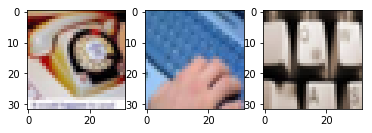

In [13]:
# Display three images from the dataset with the label 6 (index 5)

examples = train_images[(train_labels.T == 5)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [14]:
# Load the list of coarse labels from a JSON file

with open('data/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [15]:
# Print a few of the labels

cifar100_coarse_labels[0:10]

['aquatic mammals',
 'fish',
 'flowers',
 'food containers',
 'fruit and vegetables',
 'household electrical device',
 'household furniture',
 'insects',
 'large carnivores',
 'large man-made outdoor things']

In [16]:
# Print the corresponding label for the example above

cifar100_fine_labels[86], cifar100_coarse_labels[5]

('telephone', 'household electrical device')

#### Load the IMDB Dataset

In [17]:
from tensorflow.keras.datasets import imdb

In [18]:
# Load the IMDB dataset

(train_data, train_labels), (test_data, test_labels) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


In [19]:
# Print an example from the training dataset, along with its corresponding label

print(train_data[0], train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 1


In [20]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [21]:
# Determine the maximum and minimum sequence length

np.max(sequence_lengths), np.min(sequence_lengths)

(2494, 11)

#### Using Keyword Arguments

In [22]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 (this is the default)

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(skip_top=50, oov_char=2)

In [23]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [24]:
# Determine the maximum and minimum sequence length

np.max(sequence_lengths), np.min(sequence_lengths)

(2494, 11)

In [25]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [26]:
# Remove the oov_char from the sequences using the filter_list function

train_data = filter_list(train_data)

In [27]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [28]:
# Determine the maximum and minimum sequence length

np.max(sequence_lengths), np.min(sequence_lengths)

(1648, 3)

***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

In [30]:
# Load the fertility dataset

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('data/fertility_diagnosis.txt', delimiter=',', header=None, names=headers)

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

In [31]:
!ls

'Coding Tutorial.ipynb'   data


In [32]:
# Load the fertility dataset

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('data/fertility_diagnosis.txt', delimiter=',', header=None, names=headers)

In [33]:
# Print the shape of the DataFrame

fertility.shape

(100, 10)

In [34]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


#### Process the data

In [35]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1

fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [36]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0.0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1.0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0.0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0.0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1.0


In [37]:
# Convert the DataFrame so that the features are mapped to floats

fertility = fertility.astype('float32')

In [38]:
# Shuffle the DataFrame

fertility = fertility.sample(frac=1).reset_index(drop=True)

In [39]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.53,1.0,1.0,0.0,0.0,0.8,0.0,0.75,0.0
1,1.00,0.58,0.0,0.0,0.0,1.0,0.8,1.0,0.44,0.0
2,-1.00,0.72,1.0,1.0,1.0,1.0,0.8,-1.0,0.19,0.0
3,1.00,0.67,1.0,0.0,0.0,0.0,1.0,-1.0,0.25,0.0
4,-0.33,0.81,1.0,1.0,1.0,0.0,1.0,1.0,0.38,0.0


In [40]:
# Convert the field Season to a one-hot encoded vector

fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [41]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.53,1.0,1.0,0.0,0.0,0.8,0.0,0.75,0.0,0,1,0,0
1,0.58,0.0,0.0,0.0,1.0,0.8,1.0,0.44,0.0,0,0,0,1
2,0.72,1.0,1.0,1.0,1.0,0.8,-1.0,0.19,0.0,1,0,0,0
3,0.67,1.0,0.0,0.0,0.0,1.0,-1.0,0.25,0.0,0,0,0,1
4,0.81,1.0,1.0,1.0,0.0,1.0,1.0,0.38,0.0,0,1,0,0


In [42]:
# Move the Output column such that it is the last column in the DataFrame

fertility.columns = [col for col in fertility.columns if col != 'Output'] + ['Output']

In [43]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.53,1.0,1.0,0.0,0.0,0.8,0.0,0.75,0.0,0,1,0,0
1,0.58,0.0,0.0,0.0,1.0,0.8,1.0,0.44,0.0,0,0,0,1
2,0.72,1.0,1.0,1.0,1.0,0.8,-1.0,0.19,0.0,1,0,0,0
3,0.67,1.0,0.0,0.0,0.0,1.0,-1.0,0.25,0.0,0,0,0,1
4,0.81,1.0,1.0,1.0,0.0,1.0,1.0,0.38,0.0,0,1,0,0


In [44]:
# Convert the DataFrame to a numpy array.

fertility = fertility.to_numpy()

#### Split the Data

In [45]:
# Split the dataset into training and validation set

training = fertility[0:70]
validation = fertility[70:100]

In [46]:
# Verify the shape of the training data

training.shape

(70, 13)

In [47]:
# Separate the features and labels for the validation and training data

training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

#### Create the Generator

In [48]:
# Create a function that returns a generator producing inputs and labels

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])

In [49]:
# Apply the function to our training features and labels with a batch size of 10

train_generator = get_generator(training_features, training_labels, batch_size=10)

In [50]:
# Test the generator using the next() function

next(train_generator)

(array([[ 0.53,  1.  ,  1.  ,  0.  ,  0.  ,  0.8 ,  0.  ,  0.75,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.58,  0.  ,  0.  ,  0.  ,  1.  ,  0.8 ,  1.  ,  0.44,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.72,  1.  ,  1.  ,  1.  ,  1.  ,  0.8 , -1.  ,  0.19,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.67,  1.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.25,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.81,  1.  ,  1.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.38,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.92,  1.  ,  0.  ,  0.  ,  1.  ,  0.6 , -1.  ,  0.19,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.78,  1.  ,  1.  ,  1.  ,  0.  ,  0.6 ,  0.  ,  0.13,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.64,  1.  ,  1.  ,  1.  ,  0.  ,  0.8 , -1.  ,  0.31,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.78,  1.  ,  0.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.25,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.75,  1.  ,  1.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.25,  0.  ,
 

#### Build the model

In [51]:
# Create a model using Keras with 3 layers

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12,)
output_shape = (1,)

model_input = Input(input_shape)
batch_1 = BatchNormalization(momentum=0.8)(model_input)
dense_1 = Dense(100, activation='relu')(batch_1)
batch_2 = BatchNormalization(momentum=0.8)(dense_1)
output = Dense(1, activation='sigmoid')(batch_2)

model = Model([model_input], output)

In [52]:
# Display the model summary to show the resultant structure

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 100)               1300      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,849
Trainable params: 1,625
Non-trainable params: 224
_________________________________________________________________


#### Compile the model

In [53]:
# Create the optimizer object

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

In [54]:
# Compile the model with loss function and metric

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#### Train and evaluate the model using the generator

In [55]:
# Calculate the number of training steps per epoch for the given batch size.

# number of training steps before generator runs out of data

batch_size = 5
train_steps = len(training) // batch_size

In [56]:
# Set the epochs to 3

epochs = 3

In [57]:
# Train the model

for epoch in range(epochs):
    train_generator = get_generator(training_features, train_labels, batch_size=batch_size)
    validation_generator = get_generator(validation_features, validation_labels, batch_size=30)
    model.fit_generator(train_generator, steps_per_epoch=train_steps, validation_data=validation_generator,
                       validation_steps=1)

14/14 [==============================] - 0s 36ms/step - loss: 0.2511 - accuracy: 0.9429 - val_loss: 0.7734 - val_accuracy: 0.7000


In [58]:
# Try to run the fit_generator function once more; observe what happens

model.fit_generator(train_generator, steps_per_epoch=train_steps)

ValueError: Empty training data.

#### Make an infinitely looping generator

In [59]:
# Create a function that returns an infinitely looping generator

def get_generator_cyclic(features, labels, batch_size=1):
    while True:
        for n in range(int(len(features)/batch_size)):
            yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
        permuted = np.random.permutation(len(features))
        features = features[permuted]
        labels = labels[permuted]

In [60]:
# Create a generator using this function.

train_generator_cyclic = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)

In [61]:
# Assert that the new cyclic generator does not raise a StopIteration

for i in range(2*train_steps):
    next(train_generator_cyclic)

In [62]:
# Generate a cyclic validation generator

validation_generator_cyclic = get_generator_cyclic(validation_features, validation_labels, batch_size=batch_size)

In [63]:
# Train the model

model.fit_generator(train_generator_cyclic, steps_per_epoch=train_steps,
                   validation_data=validation_generator_cyclic,validation_steps=1, epochs=3)

Epoch 1/3
14/14 [==============================] - 1s 37ms/step - loss: 0.6548 - accuracy: 0.7000 - val_loss: 0.1224 - val_accuracy: 1.0000
Epoch 2/3
14/14 [==============================] - 0s 35ms/step - loss: 0.3423 - accuracy: 0.8571 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 3/3
14/14 [==============================] - 1s 36ms/step - loss: 0.1648 - accuracy: 0.9429 - val_loss: 0.0157 - val_accuracy: 1.0000


#### Evaluate the model and get predictions

In [64]:
# Let's obtain a validation data generator.

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [65]:
# Get predictions on the validation data

predictions = model.predict(validation_generator, steps=1)
print(np.round(predictions.T[0]))

[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1.]


In [66]:
# Print the corresponding validation labels

print(validation_labels)

[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1.]


In [67]:
# Obtain a validation data generator

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [68]:
# Evaluate the model

print(model.evaluate(validation_generator))

1/1 [==============================] - 0s 206ms/step - loss: 0.0175 - accuracy: 1.0000
[0.017453614622354507, 1.0]


***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

In [69]:
import matplotlib.pyplot as plt
import numpy as np

#### Load the CIFAR-10 Dataset

In [70]:
from tensorflow.keras.datasets import cifar10

In [71]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [72]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

#### Create a generator function

In [73]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size:(n+1)*batch_size], labels[n*batch_size:(n+1)*batch_size])

In [74]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(training_features, training_labels)

In [75]:
# Assess the shape of the items generated by training_generator using the `next` function to yield an item.

image, label = next(training_generator)
print(image.shape)
print(label.shape)

(1, 32, 32, 3)
(1, 10)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


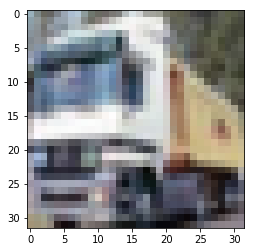

In [76]:
# Test the training generator by obtaining an image using the `next` generator function, and then using imshow to plot it.
# Print the corresponding label

from matplotlib.pyplot import imshow

image, label = next(training_generator)
image_unbatched = image[0,:,:,:]
imshow(image_unbatched)
print(label)

In [77]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(training_features, training_labels)

#### Create a data augmention generator

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [79]:
# Create a function to convert an image to monochrome

def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [80]:
# Create an ImageDataGenerator object

image_generator = ImageDataGenerator(preprocessing_function=monochrome,
                                    rotation_range=180,
                                    rescale=(1/255.0))

image_generator.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options. 

In [81]:
# Create an iterable generator using the `flow` function

image_generator_iterable = image_generator.flow(training_features, training_labels, batch_size=1,
                                                shuffle=False)

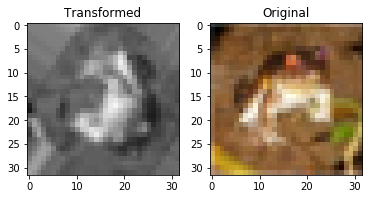

In [82]:
# Show a sample from the generator and compare with the original

image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
figs, axes = plt.subplots(1,2)
axes[0].imshow(image[0,:,:,:])
axes[0].set_title('Transformed')
axes[1].imshow(image_orig[0,:,:,:])
axes[1].set_title('Original')
plt.show()

#### Flow from directory

In [83]:
# Inspect the directory structure

train_path = 'data/flowers-recognition-split/train'
val_path = 'data/flowers-recognition-split/val'

In [84]:
# Create an ImageDataGenerator object

datagenerator = ImageDataGenerator(rescale=(1/255.0))

In [85]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [86]:
# Create a training data generator

train_generator = datagenerator.flow_from_directory(train_path, batch_size=64, classes=classes,
                                                   target_size=(16,16))

# batch_size et target_size ne doivent pas saturer la memoire => faire attention aux valeurs choisies

Found 3027 images belonging to 5 classes.


In [87]:
# Create a validation data generator

val_generator = datagenerator.flow_from_directory(val_path, batch_size=64, classes=classes,
                                                   target_size=(16,16))

Found 1296 images belonging to 5 classes.


[0. 0. 0. 1. 0.]


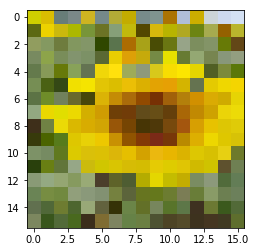

In [99]:
# Get and display an image and label from the training generator

x = next(train_generator)
imshow(x[0][4])
print(x[1][4])

In [100]:
# Reset the training generator

train_generator = datagenerator.flow_from_directory(val_path, batch_size=64, classes=classes,
                                                   target_size=(16,16))

Found 1296 images belonging to 5 classes.


#### Create a model to train

In [101]:
# Build a CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

model = tf.keras.Sequential()
model.add(Input((16,16,3)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [102]:
# Create an optimizer object

optimizer = tf.keras.optimizers.Adam(1e-3)

In [103]:
# Compile the model

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 16, 16, 8)         1544      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           4104      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 8)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 4)           516       
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)               

#### Train the model

In [105]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(train_steps_per_epoch, val_steps)

20 20


In [106]:
# Fit the model

model.fit_generator(train_generator, steps_per_epoch=train_steps_per_epoch, epochs=5)

Epoch 1/5
20/20 [==============================] - 12s 600ms/step - loss: 1.6065 - accuracy: 0.2346
Epoch 2/5
20/20 [==============================] - 12s 580ms/step - loss: 1.5948 - accuracy: 0.2995
Epoch 3/5
20/20 [==============================] - 12s 580ms/step - loss: 1.5701 - accuracy: 0.3312
Epoch 4/5
20/20 [==============================] - 12s 585ms/step - loss: 1.5360 - accuracy: 0.3482
Epoch 5/5
20/20 [==============================] - 12s 575ms/step - loss: 1.4994 - accuracy: 0.3709


#### Evaluate the model

In [107]:
# Evaluate the model

model.evaluate_generator(val_generator, steps=val_steps)

[1.4745920956134797, 0.3765625]

#### Predict using the generator

In [108]:
# Predict labels with the model

predictions = model.predict_generator(val_generator, steps=1)
print(np.round(predictions, 2))
# 64 (= batch size) predictions

[[0.18 0.26 0.2  0.17 0.2 ]
 [0.19 0.2  0.2  0.19 0.22]
 [0.15 0.13 0.25 0.16 0.3 ]
 [0.13 0.12 0.25 0.15 0.35]
 [0.18 0.25 0.2  0.17 0.2 ]
 [0.14 0.12 0.25 0.16 0.32]
 [0.15 0.13 0.24 0.16 0.31]
 [0.16 0.14 0.24 0.17 0.29]
 [0.18 0.26 0.2  0.17 0.2 ]
 [0.19 0.23 0.2  0.18 0.2 ]
 [0.19 0.24 0.19 0.18 0.2 ]
 [0.15 0.12 0.26 0.16 0.31]
 [0.15 0.13 0.25 0.16 0.3 ]
 [0.18 0.17 0.23 0.18 0.24]
 [0.18 0.24 0.2  0.18 0.21]
 [0.08 0.07 0.3  0.11 0.44]
 [0.14 0.12 0.26 0.15 0.33]
 [0.17 0.2  0.23 0.16 0.24]
 [0.18 0.26 0.2  0.17 0.2 ]
 [0.14 0.11 0.27 0.15 0.33]
 [0.09 0.07 0.29 0.12 0.42]
 [0.06 0.05 0.33 0.07 0.49]
 [0.17 0.27 0.2  0.17 0.2 ]
 [0.18 0.2  0.22 0.17 0.23]
 [0.17 0.26 0.2  0.17 0.2 ]
 [0.16 0.28 0.2  0.16 0.2 ]
 [0.19 0.23 0.2  0.18 0.2 ]
 [0.17 0.27 0.2  0.17 0.2 ]
 [0.04 0.03 0.31 0.06 0.56]
 [0.18 0.25 0.2  0.17 0.2 ]
 [0.19 0.2  0.21 0.18 0.22]
 [0.14 0.14 0.25 0.15 0.31]
 [0.11 0.1  0.27 0.13 0.39]
 [0.18 0.25 0.2  0.17 0.2 ]
 [0.16 0.15 0.23 0.18 0.28]
 [0.17 0.27 0.2  0.1

***
<a id="coding_tutorial_4"></a>
## The Dataset Class

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

#### Create a simple dataset

In [5]:
x = np.zeros((100,10,2,2))

In [6]:
# Create a dataset from the tensor x

dataset1 = tf.data.Dataset.from_tensor_slices(x)

In [7]:
# Inspect the Dataset object
print(dataset1.element_spec)


TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)


In [8]:
x2 = [np.zeros((10,2,2)), np.zeros((5,2,2))]

In [9]:
# Try creating a dataset from the tensor x2

dataset2 = tf.data.Dataset.from_tensor_slices(x2)

ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [10]:
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

In [11]:
# Create another dataset from the new x2 and inspect the Dataset object

dataset2 = tf.data.Dataset.from_tensor_slices(x2)

# works because batch sizes are the same everywhere

In [12]:
# Print the element_spec

print(dataset2.element_spec)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)


#### Create a zipped dataset

In [13]:
# Combine the two datasets into one larger dataset

dataset_zipped = tf.data.Dataset.zip((dataset1, dataset2))

In [14]:
# Print the element_spec

print(dataset_zipped.element_spec)

(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(10, 1), dtype=tf.float64, name=None))


In [15]:
# Define a function to find the number of batches in a dataset

def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
        while next(iter_dataset):
            i = i+1
    except:
        return i

In [16]:
# Find the number of batches in the zipped Dataset

get_batches(dataset_zipped) # = number of batches in SMALLEST dataset
 # = n3 batches de x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

3

#### Create a dataset from numpy arrays

In [17]:
# Load the MNIST dataset

(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [18]:
# Create a Dataset from the MNIST data

mnist_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))

In [19]:
# Inspect the Dataset object

print(mnist_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [20]:
# Inspect the length of an element using the take method

element = next(iter(mnist_dataset.take(1)))
print(len(element))

2


In [23]:
get_batches(mnist_dataset) 

60000

In [24]:
element

(<tf.Tensor: shape=(28, 28), dtype=uint8, numpy=
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175

In [25]:
# Examine the shapes of the data

print(element[0].shape)
print(element[1].shape)

(28, 28)
()


#### Create a dataset from text data

In [130]:
# Print the list of text files

text_files = sorted([f.path for f in os.scandir('data/shakespeare')])

print(text_files)

['data/shakespeare/tempest.1.1.txt', 'data/shakespeare/tempest.1.2.txt', 'data/shakespeare/tempest.2.1.txt', 'data/shakespeare/tempest.2.2.txt', 'data/shakespeare/tempest.3.1.txt', 'data/shakespeare/tempest.3.2.txt', 'data/shakespeare/tempest.3.3.txt', 'data/shakespeare/tempest.4.1.txt', 'data/shakespeare/tempest.5.1.txt']


In [131]:
# Load the first file using python and print the first 5 lines.

with open(text_files[0], 'r') as fil:
    contents = [fil.readline() for i in range(5)]
    for line in contents:
        print(line)

SCENE I. On a ship at sea: a tempestuous noise

of thunder and lightning heard.

Enter a Master and a Boatswain



Master



In [132]:
# Load the lines from the files into a dataset using TextLineDataset

shakespeare_dataset = tf.data.TextLineDataset(text_files)

In [133]:
# Use the take method to get and print the first 5 lines of the dataset

first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)
tf.Tensor(b'Enter a Master and a Boatswain', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)
tf.Tensor(b'Master', shape=(), dtype=string)


In [134]:
# Compute the number of lines in the first file

lines = []
with open(text_files[0], 'r') as fil:
    line = fil.readline()
    while line:
        lines.append(line)
        line = fil.readline()
    print(len(lines))

121


In [135]:
# Compute the number of lines in the shakespeare dataset we created

shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))

# all files loaded sequentially => canot differentiate between them

3134


#### Interleave lines from the text data files

In [136]:
# Create a dataset of the text file strings

text_files_dataset = tf.data.Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

tf.Tensor(b'data/shakespeare/tempest.1.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.1.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.2.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.2.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.3.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.4.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.5.1.txt', shape=(), dtype=string)


In [137]:
# Interleave the lines from the text files

interleaved_shakespeare_dataset = text_files_dataset.interleave(tf.data.TextLineDataset, cycle_length=9)
print(interleaved_shakespeare_dataset.element_spec)

TensorSpec(shape=(), dtype=tf.string, name=None)


In [139]:
# Print the first 10 elements of the interleaved dataset

lines = [line for line in iter(interleaved_shakespeare_dataset.take(10))]
for line in lines:
    print(line)
    
# last line is 2nd line of 1st file

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b"SCENE II. The island. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE I. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S Cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE III. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)


***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

#### Load the UCI Bank Marketing Dataset

In [142]:
# Load the CSV file into a pandas DataFrame

bank_dataframe = pd.read_csv('data/bank/bank-full.csv', delimiter=';')

In [143]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [144]:
# Print the shape of the DataFrame

print(bank_dataframe.shape)

(45211, 17)


In [145]:
# Select features from the DataFrame

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)

In [146]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,unknown,no


#### Preprocess the data

In [147]:
# Convert the categorical features in the DataFrame to one-hot encodings

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer() # equiv a keras.to_categorical
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder.fit_transform(bank_dataframe[feature]))

In [148]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,"(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 1, 0)","(0,)",2143,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
1,44,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",single,"(0, 1, 0, 0)","(0,)",29,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
2,33,"(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 1, 0, 0)","(0,)",2,"(1,)","(1,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
3,47,"(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 0, 1)","(0,)",1506,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
4,33,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)",single,"(0, 0, 0, 1)","(0,)",1,"(0,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no


In [151]:
# Shuffle the DataFrame

bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)

#### Create the Dataset object

In [154]:
# Convert the DataFrame to a Dataset

bank_dataset = tf.data.Dataset.from_tensor_slices(dict(bank_dataframe))

In [155]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.string, name=None)}

#### Filter the Dataset

In [156]:
# First check that there are records in the dataset for non-married individuals

def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

Found a person with marital status: b'married'


In [157]:
# Filter the Dataset to retain only entries with a 'divorced' marital status

bank_dataset = bank_dataset.filter(lambda x : tf.equal(x['marital'], tf.constant([b'divorced']))[0] )

In [158]:
# Check the records in the dataset again

check_divorced()

No non-divorced people were found!


#### Map a function over the dataset

In [159]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'

def map_label(x):
    x['y'] = 0 if (x['y'] == tf.constant([b'no'], dtype=tf.string)) else 1
    return x

bank_dataset = bank_dataset.map(map_label)

In [160]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

In [162]:
# Remove the 'marital' column

bank_dataset = bank_dataset.map(lambda x:{key:val for key,val in x.items() if key != 'marital'})

In [163]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

#### Create input and output data tuples

In [164]:
# Create an input and output tuple for the dataset

def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], x['default'],
                x['education'], x['housing'], x['job'], x['loan'], [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [165]:
# Map this function over the dataset

bank_dataset = bank_dataset.map(map_feature_label)

In [166]:
# Inspect the Dataset object

bank_dataset.element_spec

(TensorSpec(shape=(30,), dtype=tf.int32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

#### Split into a training and a validation set

In [167]:
# Determine the length of the Dataset

dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

5207


In [168]:
# Make training and validation sets from the dataset

training_elements = int(dataset_length * 0.7)
train_dataset = bank_dataset.take(training_elements)
validation_dataset = bank_dataset.skip(training_elements) # skip = contraire de take

#### Build a classification model

Now let's build a model to classify the features.

In [169]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [170]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [171]:
# Show the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 30)                120       
_________________________________________________________________
dense_8 (Dense)              (None, 400)               12400     
_________________________________________________________________
batch_normalization_3 (Batch (None, 400)               1600      
_________________________________________________________________
dense_9 (Dense)              (None, 400)               160400    
_________________________________________________________________
batch_normalization_4 (Batch (None, 400)               1600      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 401       
Total params: 176,521
Trainable params: 174,861
Non-trainable params: 1,660
____________________________________________

#### Train the model

In [172]:
# Create batched training and validation datasets

train_dataset = train_dataset.batch(20, drop_remainder=True)
validation_dataset = validation_dataset.batch(100)

In [173]:
# Shuffle the training data

train_dataset = train_dataset.shuffle(1000)

In [174]:
# Fit the model

history = model.fit(train_dataset, validation_data=validation_dataset, epochs=5)

Epoch 1/5
182/182 [==============================] - 24s 130ms/step - loss: 0.6606 - accuracy: 0.6536 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
182/182 [==============================] - 20s 109ms/step - loss: 0.4817 - accuracy: 0.8250 - val_loss: 0.5534 - val_accuracy: 0.7684
Epoch 3/5
182/182 [==============================] - 20s 108ms/step - loss: 0.3725 - accuracy: 0.8934 - val_loss: 0.5893 - val_accuracy: 0.8196
Epoch 4/5
182/182 [==============================] - 20s 108ms/step - loss: 0.3054 - accuracy: 0.9140 - val_loss: 0.4666 - val_accuracy: 0.8394
Epoch 5/5
182/182 [==============================] - 19s 106ms/step - loss: 0.2558 - accuracy: 0.9272 - val_loss: 0.4233 - val_accuracy: 0.8656


Text(0, 0.5, 'Accuracy')

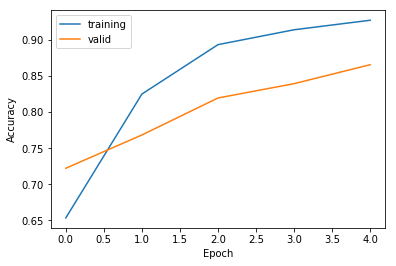

In [175]:
# Plot the training and validation accuracy

plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='valid')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')